In [1]:
import yt
import sys
import os
import numpy as np
from smartstar_find import ss_properties
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rc
from derived_fields import add_fields_ds
from yt.utilities.math_utils import ortho_find
from plot_multi_projections import tidy_data_labels
import re

In [2]:
# make disc data container
def _make_disk_L(ds, center, width_pc, height_pc):
    width = width_pc*yt.units.pc
    height = height_pc*yt.units.pc
    sp = ds.sphere(center, width)
    L = sp.quantities.angular_momentum_vector()
    L /= np.sqrt((L ** 2).sum()) # normal vector is N = L/|L|
    disk = ds.disk(center, L, width, height)
    return disk, L


def extract_simulation_name(fp):
    """
    Extract the simulation name from a file path.

    Parameters:
    fp (str): The file path.

    Returns:
    str: The extracted simulation name.
    """
    # Find all substrings that match the pattern
    matches = re.findall(r'/([^/]+)/DD', fp)

    # Return the last match (closest to the end of the string)
    if matches:
        return matches[-1]
    else:
        print("No match found")
        return None
    

def extract_dd_segment(file_path: str) -> str:
    """
    Extracts the 'DDxxxx' segment from a given file path.

    Parameters:
    file_path (str): The file path from which to extract the 'DDxxxx' segment.

    Returns:
    str: The 'DDxxxx' segment if it exists, otherwise an empty string.
    """
    # Define a regular expression pattern to find 'DDxxxx' where xxxx are numbers
    pattern = re.compile(r'DD[0-9]{4}')
    
    # Search for the pattern in the file path
    match = pattern.search(file_path)
    
    # If a match is found, return it; otherwise return an empty string
    if match:
        return match.group()
    else:
        return ""
    

def configure_font(fontsize=14):
    pyplot.rcParams['font.size'] = fontsize
    pyplot.rcParams['font.weight'] = 'light'
    rc('font', **{'family': 'serif', 'serif': ['Times'], 'weight': 'light'})
    rc('text', usetex=True)
    plt.rcParams["mathtext.default"] = "regular"

In [109]:
root_dir = "/Backup01/sgordon/pleiades/seed1-bh-only/270msun/replicating-beckmann/1B.m16-4dx/"
#root_dir = "/disk14/sgordon/cirrus-runs-rsync/seed1-bh-only/270msun/replicating-beckmann/1B.RSb16/"
ds = yt.load(os.path.join(root_dir, "DD0221/DD0221")) # 165
add_fields_ds(ds)
sim_name = tidy_data_labels(extract_simulation_name(ds.directory))
dd_name = extract_dd_segment(ds.directory)

# configure font
#configure_font(fontsize=48)
#fig = plt.figure()

# grab bh particle properties
ss_pos, ss_mass, ss_age = ss_properties(ds)

# make disk data container and define angular momentum vector L
disc_r_pc = 0.1
disc_h_pc = 0.02
_, L = _make_disk_L(ds, ss_pos, disc_r_pc, disc_h_pc)
disc_r_pc = 0.5
disk = ds.disk(ss_pos, L, disc_r_pc*yt.units.pc, disc_h_pc*yt.units.pc)

yt : [INFO     ] 2023-12-19 18:19:20,654 Parameters: current_time              = 14.035092329306
yt : [INFO     ] 2023-12-19 18:19:20,656 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-12-19 18:19:20,657 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-12-19 18:19:20,658 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-12-19 18:19:20,659 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-12-19 18:19:20,660 Parameters: current_redshift          = 26.175059876533
yt : [INFO     ] 2023-12-19 18:19:20,660 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-12-19 18:19:20,661 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-12-19 18:19:20,662 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-12-19 18:19:20,663 Parameters: hubble_constant           = 0.71
Parsing Hierarchy : 100%|██████████| 2753/2753 [00:00<00:00, 11436.92it/s]
yt : [INFO     ] 2023-12-1

ds =  DD0165


yt : [INFO     ] 2023-12-19 18:20:03,405 Projection completed
yt : [INFO     ] 2023-12-19 18:20:03,409 xlim = 0.494649 0.494659
yt : [INFO     ] 2023-12-19 18:20:03,410 ylim = 0.509616 0.509625
yt : [INFO     ] 2023-12-19 18:20:03,415 xlim = 0.494649 0.494659
yt : [INFO     ] 2023-12-19 18:20:03,416 ylim = 0.509616 0.509625
yt : [INFO     ] 2023-12-19 18:20:03,420 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800
/home/sgordon/.local/lib/python3.10/site-packages/yt/visualization/plot_modifications.py:113: VisibleDeprecationWarning: `plot_args` is deprecated. You can now pass arbitrary keyword arguments instead of a dictionary.
Deprecated since yt 4.1.0
  self._callbacks.append(cls(*args, **kwargs))
yt : [INFO     ] 2023-12-19 18:20:07,088 Projection completed
yt : [INFO     ] 2023-12-19 18:20:07,090 xlim = 0.494653 0.494654
yt : [INFO     ] 2023-12-19 18:20:07,090 ylim = 0.509620 0.509621
yt : [INFO     ] 2023-12-19 18:20:07,093 xlim = 0.494653 0.494654
yt : [I

Saving plots/disc_gridlines_1B.b16_DD0165.pdf



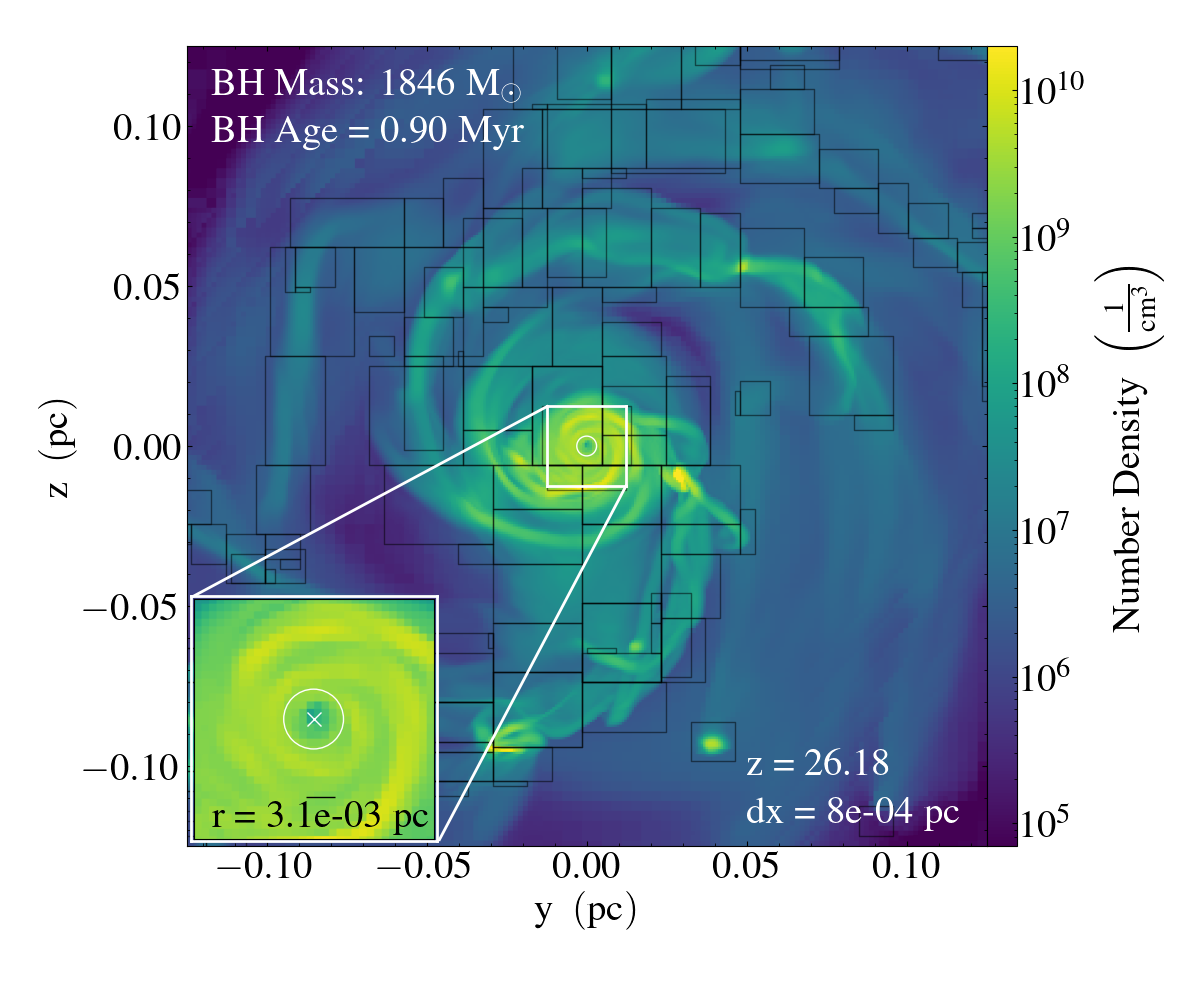

In [110]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

# Plot the projection and annotate grids
dir = "x"
p = yt.ProjectionPlot(ds, dir, ("gas", "number_density"), weight_field=("gas", "density"), center=disk.center, width=(0.25, "pc"), data_source=disk)
p.annotate_grids(alpha=0.5, min_level=18, max_level=18)
p.set_cmap(("gas", "number_density"), "viridis")
min_n = 7e4
max_n = 2e10
p.set_zlim(("gas", "number_density"), min_n, max_n)

# annotate information
a = 0.03
b = 0.94
b2 = 0.03
p.set_axes_unit('pc')
p.set_font({"size": 28})
pyplot.rcParams['font.weight'] = 'light'
rc('font', **{'family': 'serif', 'serif': ['Times'], 'weight': 'light'})
rc('text', usetex=True)
plt.rcParams["mathtext.default"] = "regular"

# top left text
p.annotate_text((a, b), r"BH Mass: {:.0f} $\rm M_\odot$".format(ss_mass.d), coord_system="axis",
                    text_args={"color": "white"}) 
p.annotate_text((a, b-0.06), "BH Age = {:.2f} Myr".format(ss_age[0] / 1e6), coord_system="axis",
                    text_args={"color": "white"})

# lower right text
p.annotate_text((0.70, b2+0.06), "z = {:.2f}".format(ds.current_redshift), coord_system="axis",
                    text_args={"color": "white"})
p.annotate_text((0.70, b2), "dx = {:.0e}".format(ds.index.get_smallest_dx().in_units('pc')), 
                coord_system="axis", text_args={"color": "white"})
# p.annotate_text([0.05, 0.05], sim_name, coord_system="axis", text_args={"color": "yellow", "fontsize": 48},
#                 inset_box_args={"boxstyle": "square,pad=0.5", "facecolor": "black", "linewidth": 5,
#                                 "edgecolor": "white", "alpha": 0.5},
# )

# annotate sphere around BH
dx = ds.index.get_smallest_dx().in_units('pc')
r_sphere = dx*4
p.annotate_sphere([0,0], r_sphere, circle_args={"color": "white"}, coord_system='plot', text=None, text_args=None)
p.annotate_marker([0,0], coord_system='plot', plot_args={'color':'white', 's':100})

# inset plot
# Define the zoom factor and create a zoomed-in projection plot
# The zoom factor is relative to the current width of the plot
zoom_factor = 0.25/0.05  # This will zoom in to 10% of the current plot width
zoomed_plot = yt.ProjectionPlot(ds, dir, ("gas", "number_density"), weight_field=("gas", "density"), center=disk.center, width=r_sphere*8, data_source=disk)
zoomed_plot = zoomed_plot.set_cmap(("gas", "number_density"), "viridis")
zoomed_plot = zoomed_plot.set_zlim(("gas", "number_density"), 1e-4, 8e9)

# Create the inset_axes instance with your desired dimensions and location
# This creates a new set of axes within the main plot
ax_inset = inset_axes(p.plots[('gas', 'number_density')].axes,
                      width="30%",  # Width of the inset relative to the parent plot
                      height="30%",  # Height of the inset
                      loc='lower left')  # Location within the parent plot

# Now display the zoomed-in plot on the inset axes
# The `zoomed_plot` is a yt plot, so we need to manually transfer its data to the inset.
# We can do this by accessing the underlying frb (Fixed Resolution Buffer) data.
zoomed_image = zoomed_plot.frb[('gas', 'number_density')].d
extent = [disk.center.d[0] - 0.125 * zoom_factor,
          disk.center.d[0] + 0.125 * zoom_factor,
          disk.center.d[1] - 0.125 * zoom_factor,
          disk.center.d[1] + 0.125 * zoom_factor]

# Plot the zoomed image on the inset axes
# Use the 'extent' to specify the bounds of the image
im = ax_inset.imshow(zoomed_image, extent=extent, cmap='viridis', origin='lower', aspect='auto', norm=LogNorm())
im.set_clim(min_n, max_n)
ax_inset.set_xticks([])
ax_inset.set_yticks([])

# Add markers to the inset axes to indicate the location of the BH
middle_x = (extent[0] + extent[1]) / 2
middle_y = (extent[2] + extent[3]) / 2
ax_inset.plot(middle_x, middle_y, marker='x', color='white', markersize=10)
# Adding a sphere-like circle
r_sphere = (extent[1] - extent[2])/8  # Radius of the sphere
circle = patches.Circle((middle_x, middle_y), r_sphere, color="white", fill=False)
ax_inset.add_patch(circle)

# add scalebar to inset plot
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
size_in_data_units = (extent[1] - extent[2])/8  # Adjust this value based on your data in pixel units
label = "r = {:.1e} pc".format(4*dx.d)
location=4 # lower right
scale_color = 'black'
bar = AnchoredSizeBar(ax_inset.transData, size_in_data_units, label, location, pad=0.01, color=scale_color, frameon=False, fontproperties={'size': 28})
ax_inset.add_artist(bar)

# Add lines connecting the zoom region to the inset plot
r_sphere = dx*4
p.annotate_line((-0.123, -0.047), (-r_sphere*4, r_sphere*4), coord_system="plot")
p.annotate_line((-0.046, -0.123), (r_sphere*4, -r_sphere*4), coord_system="plot")
p.annotate_line((-r_sphere*4, -r_sphere*4), (-r_sphere*4, r_sphere*4), coord_system="plot")
p.annotate_line((-r_sphere*4, -r_sphere*4), (r_sphere*4, -r_sphere*4), coord_system="plot")
p.annotate_line((r_sphere*4, r_sphere*4), (-r_sphere*4, r_sphere*4), coord_system="plot")
p.annotate_line((r_sphere*4, r_sphere*4), (r_sphere*4, -r_sphere*4), coord_system="plot")

# white box around inset plot
x1 = -0.1235
x2 = -0.04688
y1 = -0.1235
y2 = -0.04688
p.annotate_line((x1,y1), (x2, y1), coord_system="plot")
p.annotate_line((x1,y1), (x1, y2), coord_system="plot")
p.annotate_line((x2,y2), (x2, y1), coord_system="plot")
p.annotate_line((x2,y2), (x1, y2), coord_system="plot")

# save figure
fig_name = "plots/disc_gridlines_{}_{}.pdf".format(sim_name, dd_name)
p.save(fig_name, mpl_kwargs={"bbox_inches": "tight"})
print("Saving {}".format(fig_name))
p.show()

In [111]:
4*dx.d

0.003089237127366774